In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/classpass_data.csv")

df.head()

,persona,class_type,credit_price,current_streak,social_score,days_since_last_booking,prob,booked
0,Balanced Burner,Heated Mat Pilates,20,77,0.411497,15,0.367827,0
1,Mindful Muse,Lagree,10,44,0.693939,23,0.308226,0
2,Pilates Princess,Heated Mat Pilates,10,36,0.460541,25,0.345308,0
3,Mindful Muse,HIIT,7,95,0.998785,2,0.712901,1
4,Mindful Muse,Yoga Sculpt,10,14,0.426685,15,0.526145,1


In [3]:
# basic summary

df.shape
df.info()
df.describe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   persona                  50000 non-null  object 
 1   class_type               50000 non-null  object 
 2   credit_price             50000 non-null  int64  
 3   current_streak           50000 non-null  int64  
 4   social_score             50000 non-null  float64
 5   days_since_last_booking  50000 non-null  int64  
 6   prob                     50000 non-null  float64
 7   booked                   50000 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 3.1+ MB


<bound method NDFrame.describe of                 persona          class_type  credit_price  current_streak  \
0       Balanced Burner  Heated Mat Pilates            20              77   
1          Mindful Muse              Lagree            10              44   
2      Pilates Princess  Heated Mat Pilates            10              36   
3          Mindful Muse                HIIT             7              95   
4          Mindful Muse         Yoga Sculpt            10              14   
...                 ...                 ...           ...             ...   
49995      HIIT Hustler              Boxing             6              82   
49996     Boxing Baddie         Yoga Sculpt            10              26   
49997     Boxing Baddie  Heated Mat Pilates             8               0   
49998      HIIT Hustler              Lagree            20              44   
49999      HIIT Hustler  Heated Mat Pilates             9              51   

       social_score  days_since_last_book

In [6]:
# booking rate

booking_rate = df["booked"].mean()
print(f"Overall Booking Rate: {booking_rate:.2%}")

Overall Booking Rate: 39.07%


In [7]:
# booking by persona

booking_by_persona = df.groupby("persona")["booked"].mean().sort_values(ascending = False)
print("Booking Rate by Persona:")
print(booking_by_persona) 

Booking Rate by Persona:
persona
Lagree Loyalist     0.471491
Pilates Princess    0.457960
Mindful Muse        0.382221
Boxing Baddie       0.364541
HIIT Hustler        0.338114
Balanced Burner     0.332858
Name: booked, dtype: float64


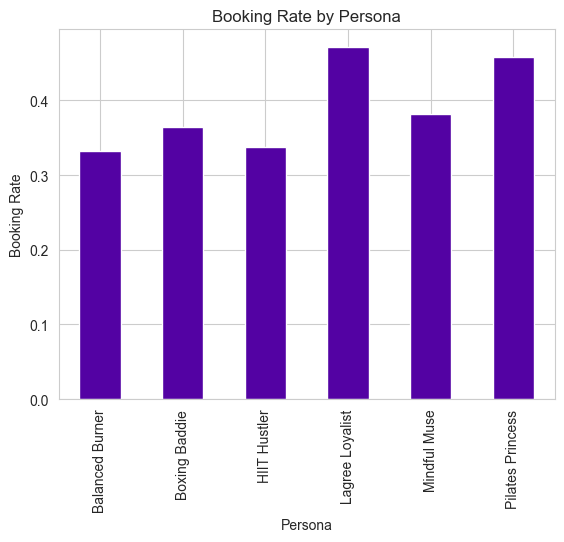

In [53]:
# bar plot of booking rate by persona

df.groupby("persona")["booked"].mean().plot(kind = "bar")
plt.title("Booking Rate by Persona")
plt.ylabel("Booking Rate")
plt.xlabel("Persona")
plt.plot(color = "plasma")
plt.show()

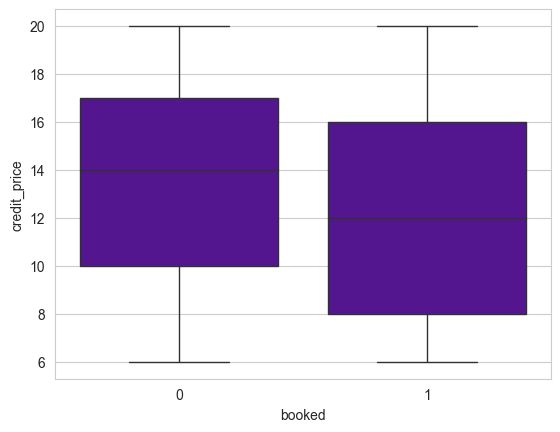

In [52]:
# booking vs price 

sns.boxplot(x = "booked", y = "credit_price", data = df)

sns.set_palette("plasma")
sns.set_style("whitegrid")

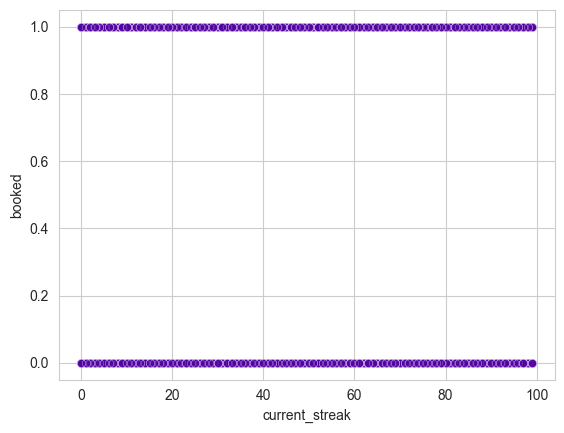

In [51]:
# streak impact 

sns.scatterplot(x = "current_streak", y = "booked", data = df, alpha = 0.3)

sns.set_palette("plasma")
sns.set_style("whitegrid")

In [18]:
# class demand

df.groupby("class_type")["booked"].sum().sort_values()

class_type
Lagree                3207
Boxing                3234
Reformer Pilates      3236
HIIT                  3275
Heated Mat Pilates    3278
Yoga Sculpt           3305
Name: booked, dtype: int64